In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# 设置中文字体
plt.rcParams['font.sans-serif']=['SimHei']
#显示负号
matplotlib.rcParams['axes.unicode_minus']=False

# 1、函数语法：

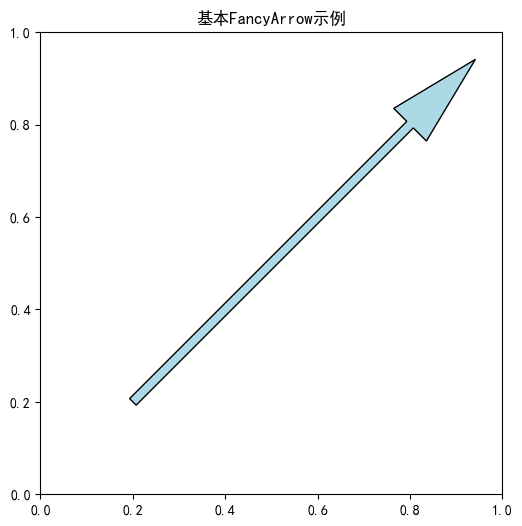

In [3]:
from matplotlib.patches import FancyArrow

# 创建图形和坐标轴
fig, ax = plt.subplots(figsize=(8, 6))

# 创建FancyArrow
arrow = FancyArrow(0.2, 0.2,         # 箭头起点坐标(x, y)
                   0.6, 0.6,         # 箭头在x和y方向上的长度(dx, dy)
                   width=0.02,       # 箭头尾部的宽度
                   head_width=0.1,   # 箭头头部的宽度
                   head_length=0.2,  # 箭头头部的长度
                   fc='lightblue',   # 箭头的填充颜色
                   ec='black'        # 箭头的边缘颜色
                  )

# 将箭头添加到坐标轴
ax.add_patch(arrow)

# 设置坐标轴范围
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal')
plt.title('基本FancyArrow示例')
plt.show()

# 2、使用示例：

### 示例 1：改变箭头形状

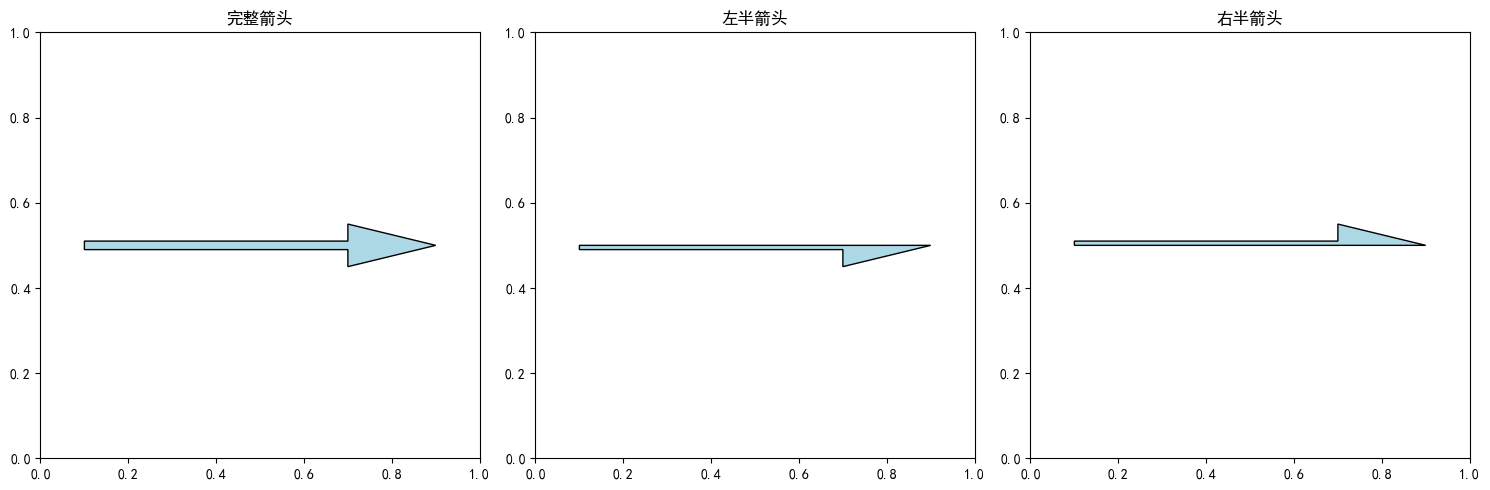

In [4]:
from matplotlib.patches import FancyArrow

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 定义箭头参数和标题
arrow_params = [
    ('full', '完整箭头'),
    ('left', '左半箭头'),
    ('right', '右半箭头')
]

# 循环创建箭头并设置子图
for i, (shape, title) in enumerate(arrow_params):
    # 创建箭头
    arrow = FancyArrow(0.1, 0.5, 0.6, 0, width=0.02,
                      head_width=0.1, head_length=0.2,
                      shape=shape, fc='lightblue', ec='black')
    
    # 添加箭头到子图并设置属性
    axes[i].add_patch(arrow)
    axes[i].set(title=title, xlim=(0, 1), ylim=(0, 1))

plt.tight_layout()
plt.show()

### 示例 2：箭头的尾部形状

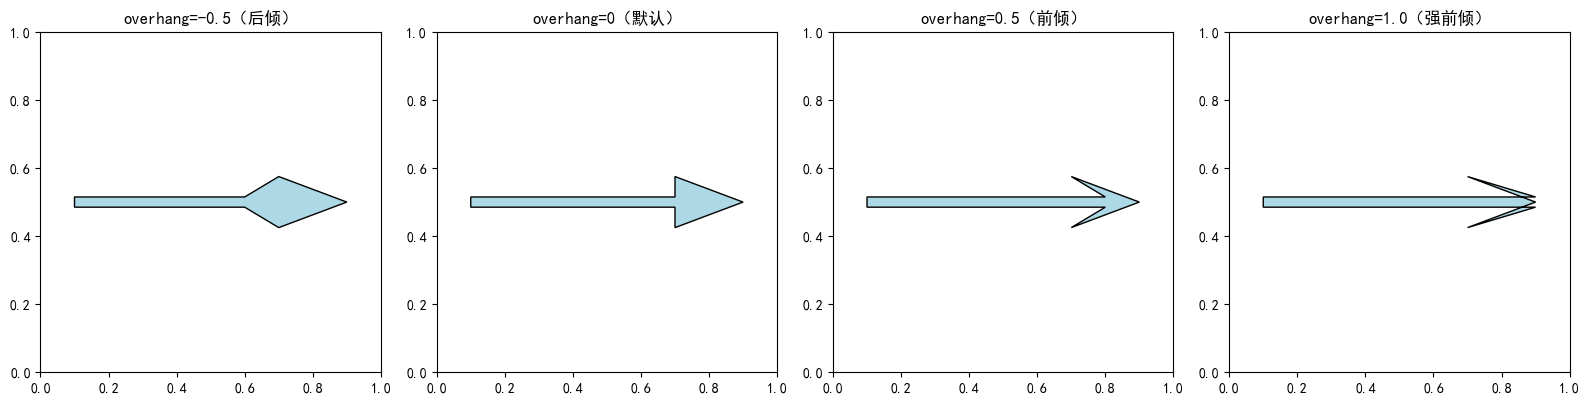

In [5]:
from matplotlib.patches import FancyArrow

fig, axes = plt.subplots(1, 4, figsize=(16, 4))

# 定义不同的overhang值及对应的标题
overhang_values = [-0.5, 0, 0.5, 1.0]
titles = ['overhang=-0.5（后倾）', 'overhang=0（默认）', 
          'overhang=0.5（前倾）', 'overhang=1.0（强前倾）']

# 循环创建不同overhang参数的箭头
for i, (overhang, title) in enumerate(zip(overhang_values, titles)):
    arrow = FancyArrow(0.1, 0.5, 0.6, 0, 
                      width=0.03,     
                      head_width=0.15,   
                      head_length=0.2,    
                      overhang=overhang,           # 重点参数：控制头部形状
                      fc='lightblue', ec='black')
    
    axes[i].add_patch(arrow)
    axes[i].set(title=title, xlim=(0, 1), ylim=(0, 1))
    axes[i].set_aspect('equal')

plt.tight_layout()
plt.show()

### 示例 3：结合其他绘图元素

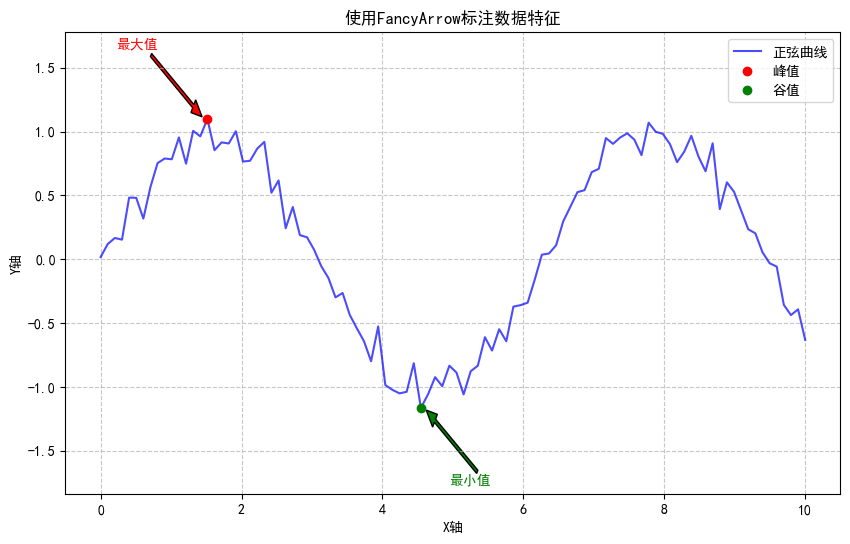

In [6]:
from matplotlib.patches import FancyArrow

# 生成示例数据
x = np.linspace(0, 10, 100)
y = np.sin(x) + 0.1 * np.random.randn(100)  # 带噪声的正弦曲线

fig, ax = plt.subplots(figsize=(10, 6))

# 绘制曲线
ax.plot(x, y, 'b-', alpha=0.7, label='正弦曲线')

# 找到峰值和谷值
peak_idx = np.argmax(y)
valley_idx = np.argmin(y)
peak_x, peak_y = x[peak_idx], y[peak_idx]
valley_x, valley_y = x[valley_idx], y[valley_idx]

# 标记峰值和谷值
ax.plot(peak_x, peak_y, 'ro', label='峰值')
ax.plot(valley_x, valley_y, 'go', label='谷值')

# 添加箭头指向峰值
arrow1 = FancyArrow(peak_x - 0.8, peak_y + 0.5, 0.6, -0.4, 
                   width=0.03, head_width=0.12, head_length=0.15, 
                   fc='red', ec='black')
ax.add_patch(arrow1)
ax.text(peak_x - 1.3, peak_y + 0.55, '最大值', color='red')

# 添加箭头指向谷值
arrow2 = FancyArrow(valley_x + 0.8, valley_y - 0.5, -0.6, 0.4,
                   width=0.03, head_width=0.12, head_length=0.15,
                   fc='green', ec='black')
ax.add_patch(arrow2)
ax.text(valley_x + 0.4, valley_y - 0.6, '最小值', color='green') 

ax.set_xlabel('X轴')
ax.set_ylabel('Y轴')
ax.set_title('使用FancyArrow标注数据特征')
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend()
plt.show()

### 示例 4：创建流程图

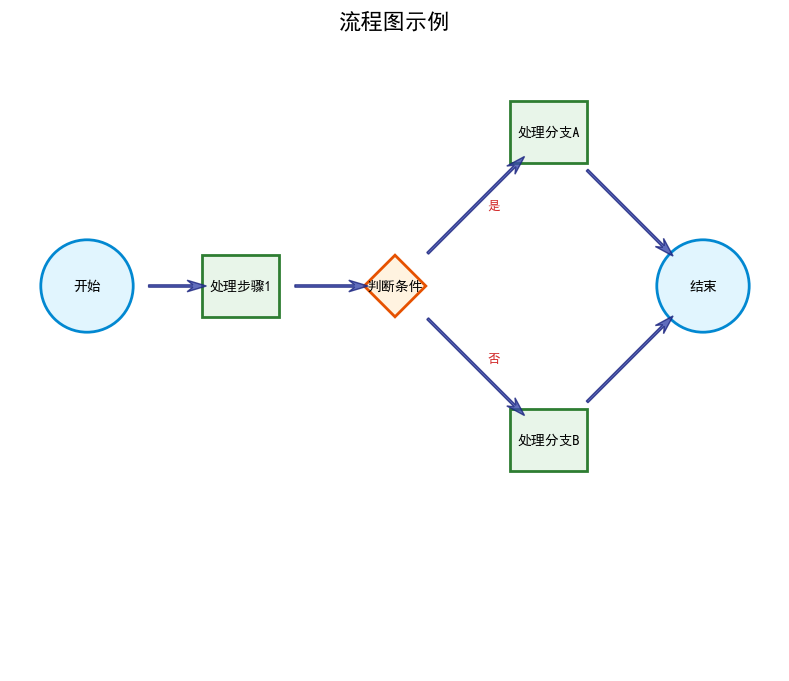

In [7]:
from matplotlib.patches import FancyArrow, Circle, Rectangle, Polygon

fig, ax = plt.subplots(figsize=(12, 8))

# 定义节点位置和类型
nodes = {
    '开始': {'pos': (1, 5), 'type': 'start'}, 
    '处理步骤1': {'pos': (3, 5), 'type': 'process'}, 
    '判断条件': {'pos': (5, 5), 'type': 'decision'}, 
    '处理分支A': {'pos': (7, 7), 'type': 'process'},
    '处理分支B': {'pos': (7, 3), 'type': 'process'},
    '结束': {'pos': (9, 5), 'type': 'end'} 
}

# 绘制不同类型的节点
node_styles = {
    'start': {'color': '#e1f5fe', 'edgecolor': '#0288d1', 'size': 0.6},
    'end': {'color': '#e1f5fe', 'edgecolor': '#0288d1', 'size': 0.6},
    'process': {'color': '#e8f5e9', 'edgecolor': '#2e7d32', 'size': (1, 0.8)},
    'decision': {'color': '#fff3e0', 'edgecolor': '#e65100', 'size': 0.8}
}

# 箭头与节点之间的间距
spacing = 0.2

for name, props in nodes.items():
    x, y = props['pos']
    style = node_styles[props['type']]
    
    if props['type'] in ['start', 'end']:
        # 开始/结束节点使用椭圆形
        ellipse = plt.Circle((x, y), style['size'], 
                            fc=style['color'], ec=style['edgecolor'], lw=2)
        ax.add_patch(ellipse)
        
    elif props['type'] == 'process':
        # 处理节点使用矩形
        w, h = style['size']
        rect = Rectangle((x - w/2, y - h/2), w, h,
                        fc=style['color'], ec=style['edgecolor'], lw=2)
        ax.add_patch(rect)
        
    elif props['type'] == 'decision':
        # 判断节点使用菱形
        s = style['size']
        diamond = Polygon([(x, y+s/2), (x+s/2, y), (x, y-s/2), (x-s/2, y)],
                         fc=style['color'], ec=style['edgecolor'], lw=2)
        ax.add_patch(diamond)
    
    # 添加节点文本
    ax.text(x, y, name, ha='center', va='center', fontsize=10, fontweight='bold')

# 绘制箭头连接并添加分支标签
connections = [
    ('开始', '处理步骤1', ''),
    ('处理步骤1', '判断条件', ''),
    ('判断条件', '处理分支A', '是'),
    ('判断条件', '处理分支B', '否'),
    ('处理分支A', '结束', ''),
    ('处理分支B', '结束', '')
]

for start, end, label in connections:
    x1, y1 = nodes[start]['pos']
    x2, y2 = nodes[end]['pos']
    
    # 根据节点类型调整箭头起点（包含间距）
    start_type = nodes[start]['type']
    if start_type in ['start', 'end']:
        start_offset = node_styles[start_type]['size'] + spacing
    elif start_type == 'process':
        start_offset = (node_styles[start_type]['size'][0] / 2) + spacing
    else:  # decision
        start_offset = (node_styles[start_type]['size'] / 2) + spacing
    
    # 根据节点类型调整箭头终点（包含间距）
    end_type = nodes[end]['type']
    if end_type in ['start', 'end']:
        end_offset = node_styles[end_type]['size'] + spacing
    elif end_type == 'process':
        end_offset = (node_styles[end_type]['size'][0] / 2) + spacing
    else:  # decision
        end_offset = (node_styles[end_type]['size'] / 2) + spacing
    
    # 计算箭头方向和长度
    dx = x2 - x1
    dy = y2 - y1
    length = (dx**2 + dy**2)**0.5
    norm_dx = dx / length
    norm_dy = dy / length
    
    # 绘制箭头（起点和终点都远离节点一定距离）
    arrow = FancyArrow(
        x1 + norm_dx * start_offset,  # 起点：远离起始节点
        y1 + norm_dy * start_offset,
        dx - norm_dx * (start_offset + end_offset),  # 长度：减去两端间距
        dy - norm_dy * (start_offset + end_offset),
        width=0.03,
        head_width=0.15,
        head_length=0.25,
        fc='#3949ab',
        ec='#1a237e',
        alpha=0.8,
        overhang=0.3
    )
    ax.add_patch(arrow)
    
    # 添加分支标签
    if label:
        mid_x = (x1 + x2) / 2
        mid_y = (y1 + y2) / 2
        # 根据方向调整标签位置
        if dy > 0:
            ax.text(mid_x + 0.2, mid_y, label, fontsize=9, color='#d32f2f')
        elif dy < 0:
            ax.text(mid_x + 0.2, mid_y, label, fontsize=9, color='#d32f2f')

ax.set_xlim(0, 10)
ax.set_ylim(0, 8)
ax.set_aspect('equal')
ax.axis('off')
plt.title('流程图示例', fontsize=16, pad=20, fontweight='bold')
plt.show()